## 과적합 감소 - 데이터 증식(Data Augmentation) 사용하기

과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생합니다. 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것입니다. 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법입니다. 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘립니다. 훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표입니다. 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것입니다.

케라스에서는 `ImageDataGenerator`가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있습니다. 

In [0]:
%matplotlib inline

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [0]:
train_files = glob.glob('training_data/*')

In [6]:
train_files[:10]

['training_data/dog.249.jpg',
 'training_data/dog.2488.jpg',
 'training_data/dog.2554.jpg',
 'training_data/dog.2550.jpg',
 'training_data/dog.2549.jpg',
 'training_data/dog.2523.jpg',
 'training_data/dog.251.jpg',
 'training_data/dog.2526.jpg',
 'training_data/dog.2563.jpg',
 'training_data/dog.258.jpg']

In [7]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

# train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files] # for linux
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files] # for windows

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
# validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files] # for linux
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files] # for windows

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5], train_labels[1500:1505], train_labels_enc[1500:1505])

['dog', 'dog', 'dog', 'dog', 'dog'] [1 1 1 1 1] ['cat', 'dog', 'dog', 'dog', 'dog'] [0 1 1 1 1]


### [ImageDataGenerator](https://keras.io/preprocessing/image/)
* rotation_range는 랜덤하게 사진을 회전시킬 각도 범위입니다(0-180 사이).
* width_shift_range와 height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
* shear_range는 랜덤하게 전단 변환을 적용할 각도 범위입니다.
* zoom_range는 랜덤하게 사진을 확대할 범위입니다.
* horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어, 풍경/인물 사진).
* fill_mode는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다.
* 추가적인 매개변수가 몇 개 더 있습니다(케라스 문서를 참고하세요). 

In [0]:
from tensorflow.keras.preprocessing.image import ____________
train_datagen = ___________(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ____________(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


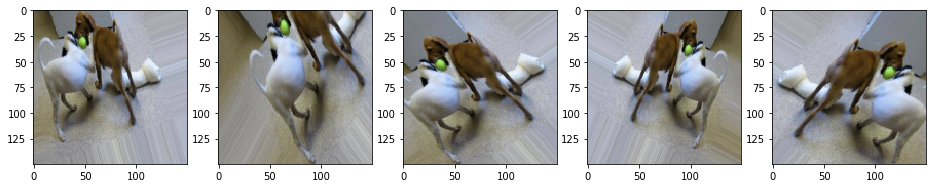

In [10]:
img_id = 1     # 2595
cat_generator = train_datagen.______(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
# print(type(cat), len(cat), type(cat[0]), len(cat[0]), type(cat[0][0]), cat[0][0].shape, type(cat[0][1]), cat[0][1].shape)
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


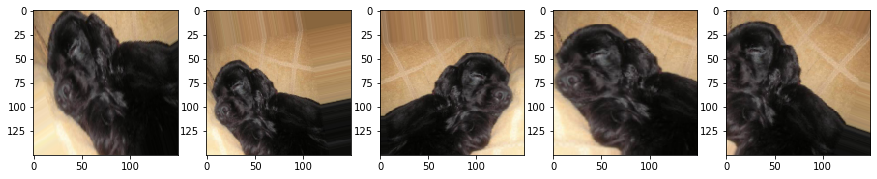

In [11]:
img_id = 1501    # 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [0]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

### 데이터 증식과 드롭아웃을 사용한 네트워크 모델 설계 및 훈련

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d

### ImageDataGenerator를 이용한 training
* train_generator는 batch_size가 30이므로 매 step마다 30개의 이미지를 생성하기 때문에 steps_per_epoch=100 을 사용하여 매 epoch마다 train dataset으로부터 무작위로 3000개의 이미지를 이용하여 train 시킬 것임
* val_generator는 batch_size가 20이므로 매 step마다 20개의 이미지를 생성하기 때문에 validation_steps=50 을 사용하여 매 epoch마다 validation dataset으로부터 무작위로 1000개의 이미지를 이용하여 validation 할 것임

In [14]:
history = ........



Epoch 1/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6950 - acc: 0.4983 - val_loss: 0.6904 - val_acc: 0.5140
Epoch 2/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6883 - acc: 0.5343 - val_loss: 0.6861 - val_acc: 0.5180
Epoch 3/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6765 - acc: 0.5713 - val_loss: 0.6666 - val_acc: 0.5880
Epoch 4/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6673 - acc: 0.5970 - val_loss: 0.6485 - val_acc: 0.6350
Epoch 5/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6563 - acc: 0.6037 - val_loss: 0.6323 - val_acc: 0.6300
Epoch 6/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6419 - acc: 0.6357 - val_loss: 0.6297 - val_acc: 0.6440
Epoch 7/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6353 - acc: 0.6330 - val_loss: 0.6483 - val_acc: 0.6330
Epoch 8/100
100/100 [===========================

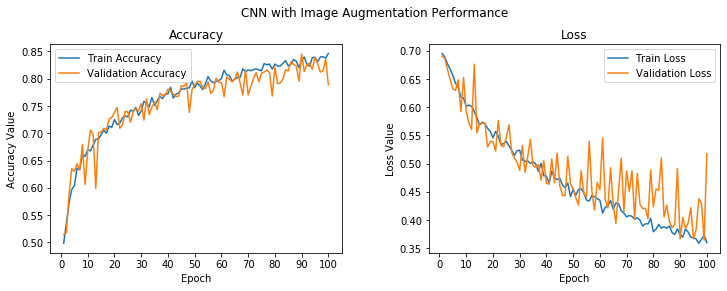

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_cnn_img_aug.h5')

* 데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성하였습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.
* 다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다. 